<a href="https://colab.research.google.com/github/evan-carey/cst383-project/blob/main/predicting_the_next_big_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting The Next Big Game

### By Omar Spiller Hernandez, Scott Lam, Evan Carey, and David Gil

### 14 February 2024



# Dataset


The Steam games dataset is a collection of information of more than 97,000 games that are available on the steam platform. This dataset collects all data using the official Steam API and Steam spy which results in a snapshot of each game's attributes. This includes things such as names, release dates, financial metrics such as discounts as well as a look into user engagement. This is measured through how many users own the game, users currently engaged in playing the games and review statistics. There is also other data such as supported devices and operating systems, region and languages the game is available. With this much information it should be possible to run an analysis of a game's performance in the market.

https://www.kaggle.com/datasets/fronkongames/steam-games-dataset

# Prediction

**Background**

The video game market on Steam is competitive with countless titles released yearly on the platform. Developers and publishers could benefit from knowing what makes a game successful.We selected the STEAM games dataset for this project. The primary question or problem that we decided to solve with this dataset is "Which game features based on the data are correlated with better user ratings?" If we analyze the relationships between available pieces of data we can see which are measures of success that give higher user ratings. For a broader scope in our project we could ask ourselves if a predictive model can be created that will estimate the likelihood of a game achieving success on release, success based on ratings.

**What We Predict**

We predict when a game has a high meta critic score and good reviews its the next big game.

# Features

Using 'User score', 'Metacritic score', 'Positive', 'Negative', 'Recommendations', 'Reviews', 'About the game' and 'Estimated owners' we should be able to predict the next up and coming game on the market. While looking at reviews, overal scores, and number of sales of the games we'll discover the most top rated games on the market.

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [5]:
# code in this cell from:
# https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to display/hide the code."></form>''')

## Upload Dataset

Upload the "games.csv" file to your Jupyter Notebook project

In [6]:
df = pd.read_csv("https://github.com/evan-carey/cst383-project/raw/refs/heads/main/converted.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97410 entries, 0 to 97409
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       97410 non-null  int64  
 1   index                       97410 non-null  int64  
 2   Name                        97404 non-null  object 
 3   Release date                97410 non-null  object 
 4   Required age                97410 non-null  int64  
 5   Price                       97410 non-null  float64
 6   DLC count                   97410 non-null  int64  
 7   Detailed description        92562 non-null  object 
 8   About the game              92540 non-null  object 
 9   Short description           92631 non-null  object 
 10  Reviews                     10125 non-null  object 
 11  Header image                97410 non-null  object 
 12  Website                     42737 non-null  object 
 13  Support url                 459

In [8]:
df.describe()

,AppID,index,Required age,Price,DLC count,Metacritic score,Achievements,Recommendations,User score,Score rank,Positive,Negative,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Peak CCU
count,9.741000e+04,9.741000e+04,97410.000000,97410.000000,97410.000000,97410.000000,97410.000000,9.741000e+04,97410.000000,44.000000,9.741000e+04,97410.000000,97410.000000,97410.000000,97410.000000,97410.000000,9.741000e+04
mean,1.524636e+06,1.524636e+06,0.282497,7.086262,0.493081,2.959193,18.562622,6.905128e+02,0.034791,98.909091,8.489366e+02,141.065989,91.797937,9.621271,81.852459,10.340417,1.627283e+02
std,8.001310e+05,8.001310e+05,2.144294,12.387782,12.832834,14.545462,160.413540,1.681717e+04,1.674105,0.857747,2.287011e+04,4278.019743,1068.494928,177.190210,1412.496536,192.711603,7.687116e+03
min,1.000000e+01,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,97.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,8.477925e+05,8.477925e+05,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,98.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,1.489990e+06,1.489990e+06,0.000000,4.190000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,99.000000,5.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,2.180648e+06,2.180648e+06,0.000000,9.990000,0.000000,0.000000,17.000000,0.000000e+00,0.000000,100.000000,3.500000e+01,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00
max,3.199580e+06,3.199580e+06,21.000000,999.980000,2366.000000,97.000000,9821.000000,3.441592e+06,100.000000,100.000000,5.764420e+06,895978.000000,145727.000000,19159.000000,208473.000000,19159.000000,1.284268e+06


## Missing Data

In [9]:
print(df.isnull().sum())

AppID                             0
index                             0
Name                              6
Release date                      0
Required age                      0
Price                             0
DLC count                         0
Detailed description           4848
About the game                 4870
Short description              4779
Reviews                       87285
Header image                      0
Website                       54673
Support url                   51510
Support email                 16035
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Metacritic url                93457
Achievements                      0
Recommendations                   0
Notes                         81937
Supported languages            4831
Full audio languages          57017
Packages                          0
Developers                     4877
Publishers                  

In [10]:
predictors = ['User score', 'Metacritic score', 'Positive', 'Negative', 'Recommendations', 'Reviews', 'About the game', 'Estimated owners']
target = 'User score'

df = df.dropna(subset = predictors)

df['About the game'] = df['About the game'].astype(str)
df['About the game'] = df['About the game'].apply(lambda x: len(x))

X = df[predictors]
y = df[target]

# Split into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

Training set: (7077, 8), Test set: (3033, 8)


<ipython-input-10-00565fe608f9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['About the game'] = df['About the game'].astype(str)
<ipython-input-10-00565fe608f9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['About the game'] = df['About the game'].apply(lambda x: len(x))


## Comparing Metacritic Score & Positive Reviews

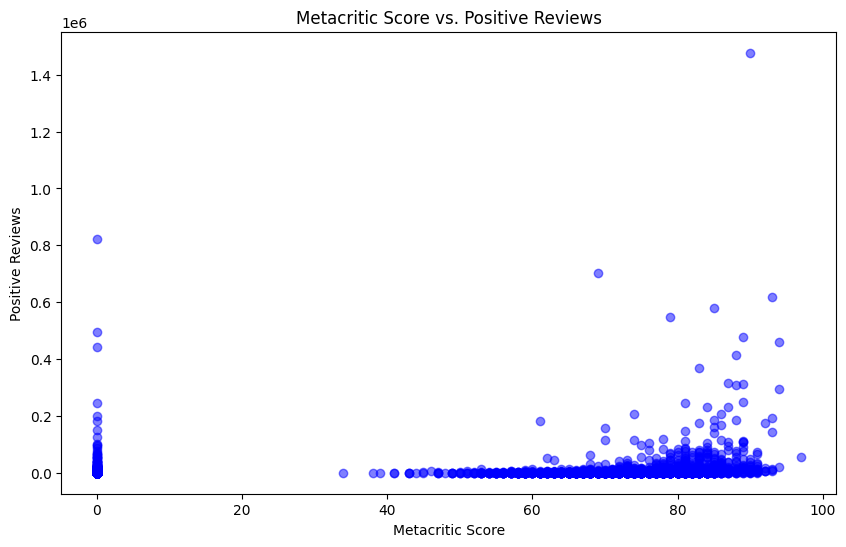

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Metacritic score'], df['Positive'], c = 'blue', alpha = 0.5)

plt.title('Metacritic Score vs. Positive Reviews')
plt.xlabel('Metacritic Score')
plt.ylabel('Positive Reviews')

plt.show()